In [ ]:
# importing labraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Model
from keras.layers import Dense,Flatten,GlobalAveragePooling2D
from keras.layers import BatchNormalization ,Dropout
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.applications import InceptionResNetV2



In [9]:
# path of training data
Training_data_path='/content/drive/MyDrive/output'


In [17]:
# define hyper parameters
image_size=[224,224]
batch_size=64
learning_rate=0.002
momentum=0.3
epochs=100
patience=30


In [11]:
train_img_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)


In [12]:
# build the training  generator

train_data= train_img_datagen.flow_from_directory(Training_data_path,
                                                  target_size=(224,224),
                                                  subset='training',
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)
# build the validation generator

val_data=train_img_datagen.flow_from_directory(Training_data_path,
                                               target_size=(224,224),
                                               subset='validation',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)



Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


In [13]:
train_data.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [14]:
class_mapping={
 0:'Black-grass',
 1:'Charlock',
 2:'Cleavers',
 3:'Common Chickweed',
 4:'Common wheat',
 5:'Fat Hen',
 6:'Loose Silky-bent',
 7:'Maize',
 8:'Scentless Mayweed',
 9:'Shepherds Purse',
 10:'Small-flowered Cranesbill',
 11:'Sugar beet'

}

In [15]:
# import the InceptionResNetV2 model
pre_train_model=InceptionResNetV2(input_shape=image_size+[3],
                                  include_top=False, #leave out the last fully connect layer
                                  weights='imagenet')

219055592/219055592 [==============================] - 6s 0us/step


In [16]:
# freeze the pre_train_model
for layer in pre_train_model.layers:
  layer.trainable=False

In [18]:
# Flatten the output layer to 1 dimension
layers=Flatten()(pre_train_model.output)

# add a fully connected layer with 1024 hidden unit and ReLU activation
layers=Dense(1024,activation='relu')(layers)

# add dropout rate of 0.5
# layers=Dropout(0.5,name='Dropout_1')(layers)

# add batchnormailzation
layers = BatchNormalization()(layers)

layers = Dense(512, activation='relu')(layers)
# layers = Dropout(0.5,name = 'Dropout')(layers)

# add a final  layer  for classification
prediction = Dense(12,activation = 'softmax')(layers)

model = Model(inputs=pre_train_model.input,outputs= prediction)

In [19]:
# specify optimizer and loss

adam=optimizers.SGD(learning_rate=learning_rate,momentum=momentum)
model.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#  summary of model

model.summary()

In [22]:
# train the model with your data
history= model.fit(
    train_data,
    validation_data=val_data,
    batch_size=batch_size,
    epochs=epochs,
    steps_per_epoch=len(train_data)//10
)

Epoch 1/100
11/11 [==============================] - 849s 83s/step - loss: 1.6957 - accuracy: 0.4688 - val_loss: 1.6511 - val_accuracy: 0.4900
Epoch 2/100
11/11 [==============================] - 197s 18s/step - loss: 1.5294 - accuracy: 0.5170 - val_loss: 1.4142 - val_accuracy: 0.5565
Epoch 3/100
11/11 [==============================] - 183s 17s/step - loss: 1.2396 - accuracy: 0.6023 - val_loss: 1.3260 - val_accuracy: 0.5871
Epoch 4/100
11/11 [==============================] - 159s 14s/step - loss: 1.1064 - accuracy: 0.6562 - val_loss: 1.1484 - val_accuracy: 0.6251
Epoch 5/100
11/11 [==============================] - 148s 14s/step - loss: 1.0638 - accuracy: 0.6392 - val_loss: 1.0862 - val_accuracy: 0.6579
Epoch 6/100
11/11 [==============================] - 134s 12s/step - loss: 0.8856 - accuracy: 0.6960 - val_loss: 1.0625 - val_accuracy: 0.6526
Epoch 7/100
11/11 [==============================] - 122s 11s/step - loss: 0.9071 - accuracy: 0.7017 - val_loss: 0.9808 - val_accuracy: 0.6758

In [23]:
# saving the model
model.save('model.h5')

In [24]:
training_loss_history = history.history['loss']
validation_loss_history = history.history['val_loss']

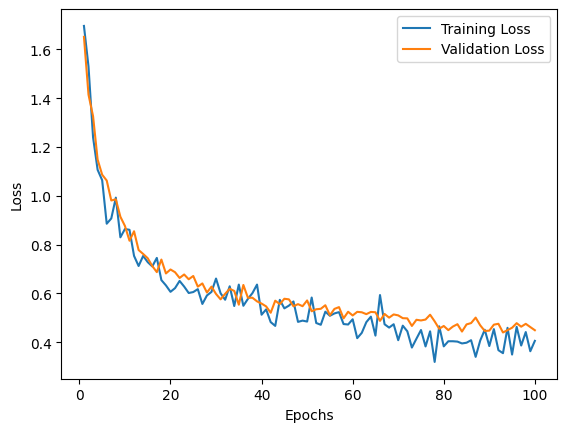

In [25]:
# plot the training loss and validation loss

epochs = range(1, len(training_loss_history) + 1)
plt.plot(epochs, training_loss_history, label='Training Loss')
plt.plot(epochs, validation_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
training_accuracy_history = history.history['accuracy']
validation_accuracy_history = history.history['val_accuracy']

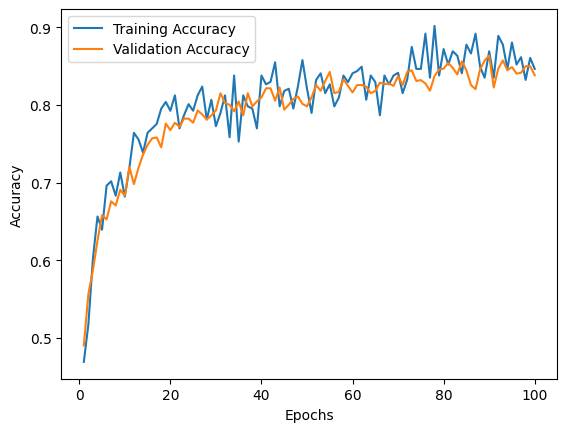

In [27]:
# plot the training accuracy and validation accuray

epochs = range(1, len(training_accuracy_history) + 1)
plt.plot(epochs, training_accuracy_history, label='Training Accuracy')
plt.plot(epochs, validation_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_path='/content/model.h5'

In [ ]:
model=load_model(model_path)

In [ ]:
model.summary()